<a href="https://www.kaggle.com/code/kirillborovikov/store-sales-predict?scriptVersionId=102527733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from statsmodels.graphics.gofplots import qqplot
import xgboost as xgb
from sklearn import preprocessing
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
dat_oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
dat_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [3]:
dat_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [4]:
dat_simple_submission = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv')
dat_simple_submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [5]:
dat_simple_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [6]:
dat_holidays_events = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
dat_holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [7]:
dat_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [8]:
dat_stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
dat_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [9]:
dat_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [10]:
dat_train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
dat_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [11]:
dat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [12]:
dat_test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
dat_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [13]:
dat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [14]:
#sns.PairGrid(dat_train).map(sns.scatterplot) #попарный график зависимости

In [15]:
datv1 = dat_train.merge(dat_oil)
datv1

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
2143741,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
2143742,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
2143743,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
2143744,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [16]:
datv2 = datv1.merge(dat_stores)
datv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143746 entries, 0 to 2143745
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   dcoilwtico   float64
 7   city         object 
 8   state        object 
 9   type         object 
 10  cluster      int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 196.3+ MB


In [17]:
#dat_v2 = pd.merge_orderer(dat, dat_stores, fill_method=)
#dat_v2

In [18]:
datv2.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,2.143746e+06,2.143746e+06,2.143746e+06,2.143746e+06,2.072466e+06,2.143746e+06
mean,1.500529e+06,2.750000e+01,3.216291e+02,2.831395e+00,6.792559e+01,8.481481e+00
std,8.668099e+05,1.558579e+01,9.707549e+02,1.324253e+01,2.566633e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.497762e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.638000e+01,4.000000e+00
50%,1.499552e+06,2.750000e+01,1.000000e+01,0.000000e+00,5.333000e+01,8.500000e+00
75%,2.252893e+06,4.100000e+01,1.800000e+02,0.000000e+00,9.580000e+01,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


<AxesSubplot:>

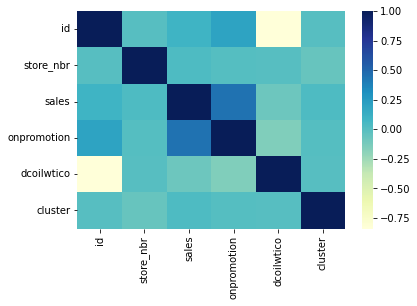

In [19]:
sns.heatmap(datv2.corr(), cmap="YlGnBu") #График корелляции

In [20]:
datv2.drop(['date', 'store_nbr', 'state'], axis=1, inplace=True)
datv2

,id,family,sales,onpromotion,dcoilwtico,city,type,cluster
0,0,AUTOMOTIVE,0.000,0,NaN,Quito,D,13
1,1,BABY CARE,0.000,0,NaN,Quito,D,13
2,2,BEAUTY,0.000,0,NaN,Quito,D,13
3,3,BEVERAGES,0.000,0,NaN,Quito,D,13
4,4,BOOKS,0.000,0,NaN,Quito,D,13
...,...,...,...,...,...,...,...,...
2143741,3000883,POULTRY,438.133,0,47.57,Quito,B,6
2143742,3000884,PREPARED FOODS,154.553,1,47.57,Quito,B,6
2143743,3000885,PRODUCE,2419.729,148,47.57,Quito,B,6
2143744,3000886,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,B,6


In [21]:
datv2['family'] #смотрим нужный нам столбик

0                          AUTOMOTIVE
1                           BABY CARE
2                              BEAUTY
3                           BEVERAGES
4                               BOOKS
                      ...            
2143741                       POULTRY
2143742                PREPARED FOODS
2143743                       PRODUCE
2143744    SCHOOL AND OFFICE SUPPLIES
2143745                       SEAFOOD
Name: family, Length: 2143746, dtype: object

In [22]:
lenc_fam = preprocessing.LabelEncoder() #создаем функцию превращаю категориальные данные в числовые
lenc_fam.fit(datv2['family']) #обучаем ее на нашем столбце 

LabelEncoder()

In [23]:
lenc_fam.classes_

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [24]:
datv2['family'] = lenc_fam.transform(datv2['family']) #заменяем значения в массиве на числовые для столбца family

In [25]:
lenc_city = preprocessing.LabelEncoder() #создаем функцию превращаю категориальные данные в числовые
lenc_city.fit(datv2['city']) #обучаем ее на нашем столбце 
datv2['city'] = lenc_city.transform(datv2['city']) #заменяем значения в массиве на числовые для столбца city

In [26]:
lenc_type = preprocessing.LabelEncoder() #создаем функцию превращаю категориальные данные в числовые
lenc_type.fit(datv2['type']) #обучаем ее на нашем столбце 
datv2['type'] = lenc_type.transform(datv2['type']) #заменяем значения в массиве на числовые для столбца type

## Ищем выбросы с помощью плотбоксов

id


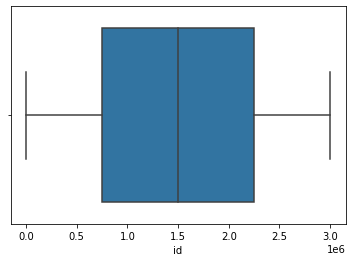

Минимальное значение:  0
Максимальное значение:  3000887
Среднее значение:  1500528.6745635911
Медианное значение:  1499552.5



family


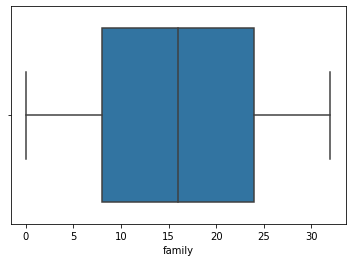

Минимальное значение:  0
Максимальное значение:  32
Среднее значение:  16.0
Медианное значение:  16.0



sales


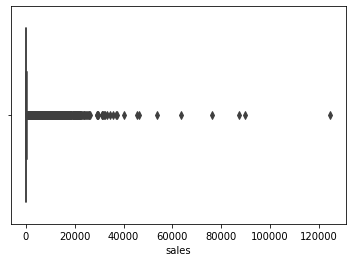

Минимальное значение:  0.0
Максимальное значение:  124717.0
Среднее значение:  321.6290805365112
Медианное значение:  10.0



onpromotion


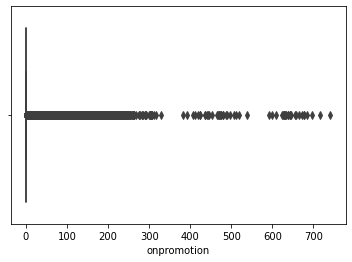

Минимальное значение:  0
Максимальное значение:  741
Среднее значение:  2.8313946708238755
Медианное значение:  0.0



dcoilwtico


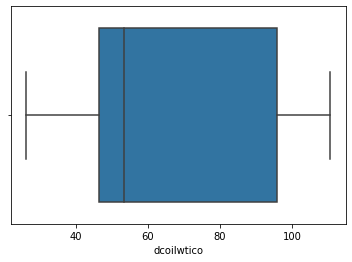

Минимальное значение:  26.19
Максимальное значение:  110.62
Среднее значение:  67.92558899399383
Медианное значение:  nan



city


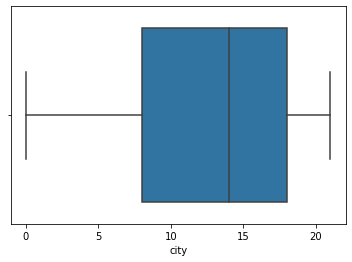

Минимальное значение:  0
Максимальное значение:  21
Среднее значение:  12.555555555555555
Медианное значение:  14.0



type


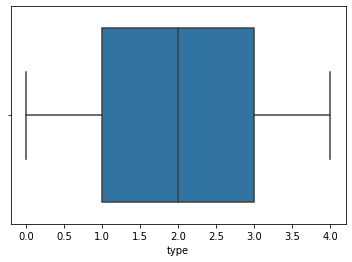

Минимальное значение:  0
Максимальное значение:  4
Среднее значение:  2.0
Медианное значение:  2.0



cluster


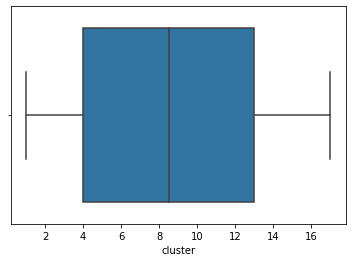

Минимальное значение:  1
Максимальное значение:  17
Среднее значение:  8.481481481481481
Медианное значение:  8.5





In [27]:
colnams = datv2.columns
for colname in colnams:
    print(colname)
    sub_data = datv2[colname]
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data);
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data))
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data))
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data))

    print("Медианное значение: ", end=" ")
    print(np.median(sub_data))
    print("\n\n")

Удалим выбросы в вкладке sales

In [28]:
datv2.loc[datv2['sales'] > 13000, 'sales'] = np.nan
datv2.isnull().sum()

id                 0
family             0
sales            449
onpromotion        0
dcoilwtico     71280
city               0
type               0
cluster            0
dtype: int64

In [29]:
datv3 = datv2.dropna(axis=0) #удаляем выбросы
datv3.isnull().sum()

id             0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
type           0
cluster        0
dtype: int64

id


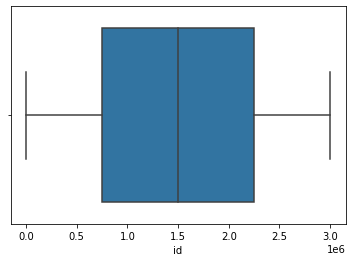

Минимальное значение:  0
Максимальное значение:  3000887
Среднее значение:  1500528.6745635911
Медианное значение:  1499552.5



family


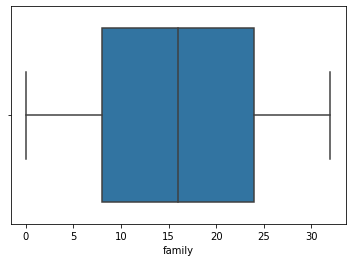

Минимальное значение:  0
Максимальное значение:  32
Среднее значение:  16.0
Медианное значение:  16.0



sales


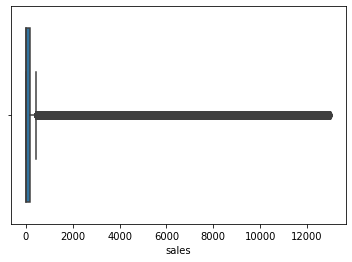

Минимальное значение:  0.0
Максимальное значение:  12995.511
Среднее значение:  318.12068254414726
Медианное значение:  nan



onpromotion


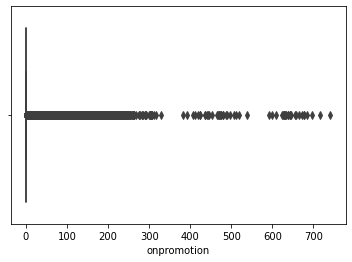

Минимальное значение:  0
Максимальное значение:  741
Среднее значение:  2.8313946708238755
Медианное значение:  0.0



dcoilwtico


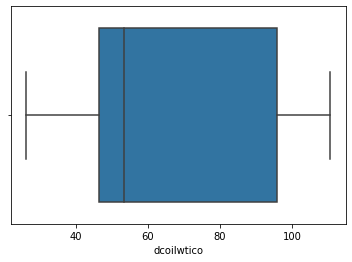

Минимальное значение:  26.19
Максимальное значение:  110.62
Среднее значение:  67.92558899399383
Медианное значение:  nan



city


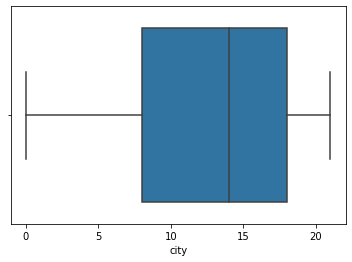

Минимальное значение:  0
Максимальное значение:  21
Среднее значение:  12.555555555555555
Медианное значение:  14.0



type


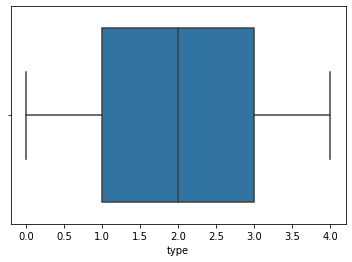

Минимальное значение:  0
Максимальное значение:  4
Среднее значение:  2.0
Медианное значение:  2.0



cluster


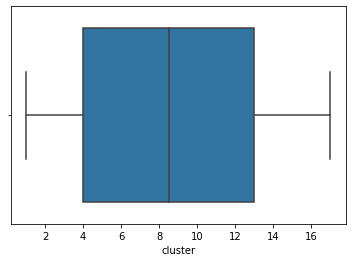

Минимальное значение:  1
Максимальное значение:  17
Среднее значение:  8.481481481481481
Медианное значение:  8.5





In [30]:
colnams2 = datv2.columns
for colname2 in colnams2:
    print(colname2)
    sub_data2 = datv2[colname2]
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data2);
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data2))
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data2))
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data2))

    print("Медианное значение: ", end=" ")
    print(np.median(sub_data2))
    print("\n\n")

## Нормализация данных MinMaxScaler'ом

In [31]:
minmaxscalar = preprocessing.MinMaxScaler()
col = datv3.columns
result = minmaxscalar.fit_transform(datv3)
data_norm = pd.DataFrame(result, columns=col)
data_norm

,id,family,sales,onpromotion,dcoilwtico,city,type,cluster
0,0.000000e+00,0.00000,0.000154,0.000000,0.792965,0.857143,0.75,0.7500
1,3.334328e-07,0.03125,0.000000,0.000000,0.792965,0.857143,0.75,0.7500
2,6.668656e-07,0.06250,0.000154,0.000000,0.792965,0.857143,0.75,0.7500
3,1.000298e-06,0.09375,0.083952,0.000000,0.792965,0.857143,0.75,0.7500
4,1.333731e-06,0.12500,0.000000,0.000000,0.792965,0.857143,0.75,0.7500
...,...,...,...,...,...,...,...,...
2072040,9.999987e-01,0.87500,0.033714,0.000000,0.253228,0.857143,0.25,0.3125
2072041,9.999990e-01,0.90625,0.011893,0.001350,0.253228,0.857143,0.25,0.3125
2072042,9.999993e-01,0.93750,0.186197,0.199730,0.253228,0.857143,0.25,0.3125
2072043,9.999997e-01,0.96875,0.009311,0.010796,0.253228,0.857143,0.25,0.3125


In [32]:
data_norm.isnull().sum() #смотрим пустые значения

id             0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
type           0
cluster        0
dtype: int64

In [33]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072045 entries, 0 to 2072044
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           float64
 1   family       float64
 2   sales        float64
 3   onpromotion  float64
 4   dcoilwtico   float64
 5   city         float64
 6   type         float64
 7   cluster      float64
dtypes: float64(8)
memory usage: 126.5 MB


In [34]:
data_pure = data_norm.dropna(axis=0) #удаляем выбросы
data_pure.isnull().sum()

id             0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
type           0
cluster        0
dtype: int64

## Построение моделей

Загрузка библиотек

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten
from keras.losses import SparseCategoricalCrossentropy

from numpy.random import seed

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [36]:
input_colnames = ['family',
                 'onpromotion',
                 'dcoilwtico',
                 'city',
                 'type',
                 'cluster']
output_colnames = ['sales']

In [37]:
in_train_mod = data_pure[input_colnames] #Массив на вход
out_train_mod = data_pure[output_colnames] #Массив на выход
out_train_mod

,sales
0,0.000154
1,0.000000
2,0.000154
3,0.083952
4,0.000000
...,...
2072040,0.033714
2072041,0.011893
2072042,0.186197
2072043,0.009311


Подготовка тестовой и обучающей выборки

In [38]:
train_in, test_in, train_out, test_out = train_test_split(in_train_mod, out_train_mod, test_size=0.3)

## Построение нескольких моделей для прогноза параметра sales.

In [39]:
models = [RandomForestRegressor(n_estimators=87), # случайный лес
          KNeighborsRegressor(n_neighbors=21)] # метод ближайших соседей

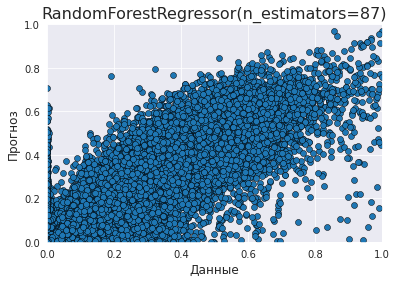

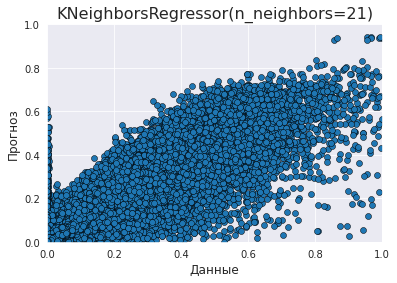

,R2_Y1
Model,
RandomForestRegressor,0.880310
KNeighborsRegressor,0.870675


In [40]:
models_prov = pd.DataFrame() #создаем двумерный массив
models_results = pd.DataFrame()
tmp = {} #временный словарь
tmp2 = {}
for model in models:      #цикл перебора моделей
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    tmp2['Model'] = m[:m.index('(')]
    
    for i in range(train_out.shape[1]): #цикл проверки модели
        model.fit(train_in, train_out[output_colnames[i]])  #обучаем модель
        tmp['R2_Y%s'%str(i+1)] = r2_score(test_out[output_colnames[i]], model.predict(test_in))#считаем коэффициент детерминации
        #Создадим датасет с тестовыми данными и прогнозными значениями для каждой модели
        tmp2 = pd.DataFrame({'Данные': test_out[output_colnames[i]],'Прогноз': model.predict(test_in)})   
        
    models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив
    models_results = tmp2 
    #Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
    sns.set_style('darkgrid')
    plt.title( model, size=16)
    plt.xlabel('Данные',size=12)
    plt.ylabel('Прогноз',size=12)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    sns.scatterplot(x='Данные', y='Прогноз', data=models_results, edgecolor='black', palette='cubehelix')
    plt.show()
    
models_prov.set_index('Model', inplace=True) #делаем индекс по названию модели
models_prov

In [41]:
#invert_scalar = minmaxscalar.inverse_transform(X)
#data_norm = pd.DataFrame(result, columns=col)
#data_norm

In [42]:
dat_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [43]:
dat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [44]:
dat_test['family'] = lenc_fam.transform(dat_test['family']) #заменяем значения в массиве на числовые для столбца family
dat_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,0,0
1,3000889,2017-08-16,1,1,0
2,3000890,2017-08-16,1,2,2
3,3000891,2017-08-16,1,3,20
4,3000892,2017-08-16,1,4,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,28,1
28508,3029396,2017-08-31,9,29,0
28509,3029397,2017-08-31,9,30,1
28510,3029398,2017-08-31,9,31,9


In [45]:
dat_test.drop(['date'], axis=1, inplace=True)
dat_test

,id,store_nbr,family,onpromotion
0,3000888,1,0,0
1,3000889,1,1,0
2,3000890,1,2,2
3,3000891,1,3,20
4,3000892,1,4,0
...,...,...,...,...
28507,3029395,9,28,1
28508,3029396,9,29,0
28509,3029397,9,30,1
28510,3029398,9,31,9


In [46]:
#new_predict = models[0].predict(dat_test)